In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import ml_metrics as metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [7]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [8]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [9]:
gnb_10k = GaussianNB()
gnb_11k = GaussianNB()
gnb_12k = GaussianNB()
gnb_13k = GaussianNB()
gnb_14k = GaussianNB()
gnb_15k = GaussianNB()

In [10]:
gnb_10k.fit(X_train_new_10k, Y_train_new_10k)
gnb_11k.fit(X_train_new_11k, Y_train_new_11k)
gnb_12k.fit(X_train_new_12k, Y_train_new_12k)
gnb_13k.fit(X_train_new_13k, Y_train_new_13k)
gnb_14k.fit(X_train_new_14k, Y_train_new_14k)
gnb_15k.fit(X_train_new_15k, Y_train_new_15k)

GaussianNB()

In [11]:
gnb_pred_10k = gnb_10k.predict(X_test_new_10k)
gnb_pred_11k = gnb_11k.predict(X_test_new_11k)
gnb_pred_12k = gnb_12k.predict(X_test_new_12k)
gnb_pred_13k = gnb_13k.predict(X_test_new_13k)
gnb_pred_14k = gnb_14k.predict(X_test_new_14k)
gnb_pred_15k = gnb_15k.predict(X_test_new_15k)

In [12]:
gnb_prob_10k = gnb_10k.predict_proba(X_test_new_10k)
gnb_prob_11k = gnb_11k.predict_proba(X_test_new_11k)
gnb_prob_12k = gnb_12k.predict_proba(X_test_new_12k)
gnb_prob_13k = gnb_13k.predict_proba(X_test_new_13k)
gnb_prob_14k = gnb_14k.predict_proba(X_test_new_14k)
gnb_prob_15k = gnb_15k.predict_proba(X_test_new_15k)

In [13]:
accuracy_10k = accuracy_score(Y_test_new_10k, gnb_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, gnb_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, gnb_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, gnb_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, gnb_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, gnb_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.06034356188518573
Accuracy 0.05787697897742019
Accuracy 0.059278039357720635
Accuracy 0.06140542907180385
Accuracy 0.054707509476488066
Accuracy 0.059798929364146755


In [14]:
map_10k = mean_average_precision(Y_test_new_10k, gnb_prob_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, gnb_prob_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, gnb_prob_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, gnb_prob_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, gnb_prob_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, gnb_prob_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.1112342778838154
Mean Average Precision@5 0.10521238861493208
Mean Average Precision@5 0.11069258320254337
Mean Average Precision@5 0.10676627262113252
Mean Average Precision@5 0.10347812724106137
Mean Average Precision@5 0.10861296078687381


In [15]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

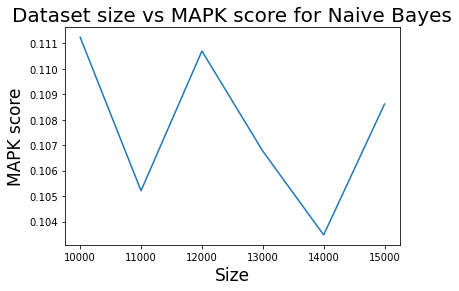

In [16]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for Naive Bayes",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()

In [17]:
map_score = make_scorer(mean_average_precision, needs_proba=True, greater_is_better=True)

In [18]:
param_grid_gnb = {'var_smoothing': [1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

In [19]:
gnb = GaussianNB()
gnb_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, scoring=map_score, cv=3)
gnb_grid.fit(X_train_new_15k, Y_train_new_15k)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring=make_scorer(mean_average_precision, needs_proba=True))

In [20]:
print(gnb_grid.best_params_)

{'var_smoothing': 1e-09}


In [21]:
y_test_grid = gnb_grid.predict(X_test_new_15k)
y_test_proba_grid = gnb_grid.predict_proba(X_test_new_15k)
accuracy_grid = accuracy_score(Y_test_new_15k, y_test_grid)
print('Accuracy after gridsearch', accuracy_grid)
map_grid = mean_average_precision(Y_test_new_15k, y_test_proba_grid)
print("Mean Average Precision@5 after gridsearch", map_grid)

Accuracy after gridsearch 0.059798929364146755
Mean Average Precision@5 after gridsearch 0.10861296078687381
